# Data Analysis

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import the dataset
data = pd.read_csv('Kai & Karo_clean_data.csv')
data.head()

,Vehicle,Manufacturer,Model,Transmission Type,CC,Year,Car Age,Usage Origin,Price,Price Range
0,Honda Vezel,Honda,Vezel,Automatic,1500.0,2017,7,Foreign Used,2689999.0,2M-3M
1,Toyota Fielder,Toyota,Fielder,Automatic,1500.0,2017,7,Kenyan Used,1689999.0,1M-2M
2,Mercedes Benz C200,Mercedes Benz,C200,Automatic,1800.0,2010,14,Kenyan Used,1499999.0,1M-2M
3,Toyota Kluger,Toyota,Kluger,Automatic,3500.0,2003,21,Kenyan Used,879999.0,500k-1M
4,Mercedes Benz C250,Mercedes Benz,C250,Automatic,2000.0,2017,7,Foreign Used,4649999.0,3M-5M


## Q1.Which car make is most common?

In [26]:
# Top 20 most common manufacturers in kenya
make_categories = data['Manufacturer'].value_counts()
make_categories.head(20)

Manufacturer
Toyota           331
Nissan           143
Mazda            131
Audi             108
Subaru           104
Mercedes Benz    100
Volkswagen        89
Bmw               74
Volvo             43
Honda             39
Mitsubishi        39
Peugeot           33
Range Rover       26
Ford              24
Suzuki            23
Jeep              22
Lexus             21
Land Rover        17
Porsche           15
Daihatsu           7
Name: count, dtype: int64

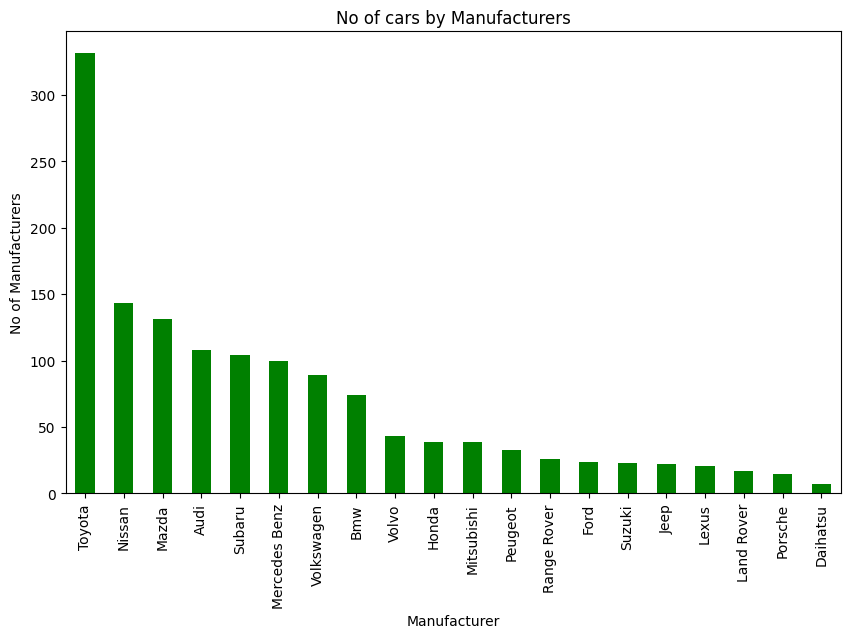

In [68]:
# Visualization of the top 20 manufacturers
top_n = make_categories.head(20)
plt.figure(figsize = (10,6))
top_n.plot(kind = 'bar', color = 'green')
plt.ylabel('No of Manufacturers')
plt.title('No of cars by Manufacturers')
plt.show()

## 2.How has distribution of car prices varied over the years?

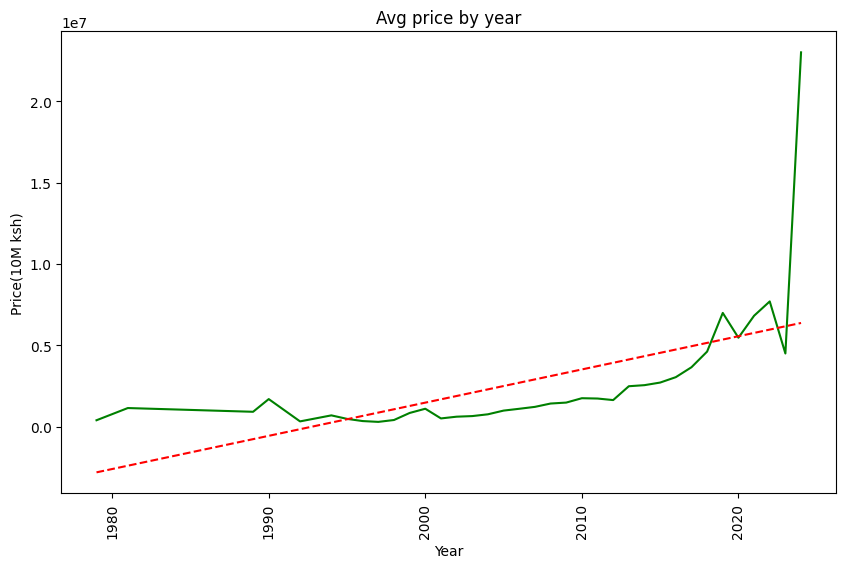

Trend line equation: y = 203920.88x + -406359521.82


In [7]:
# Calculating mean by year
avg_price = data.groupby('Year').mean(numeric_only = True)['Price']
year = avg_price.index
price = avg_price.values

# Plot
plt.figure(figsize = (10,6))
plt.plot(year,price, color = 'green')

# Fit a trend line
z = np.polyfit(year, price, 1)
p = np.poly1d(z)
plt.plot(year, p(year), linestyle='--', color='red', label='Trend Line')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Price(10M ksh)')
plt.title('Avg price by year')

# Rotating the years for better readability
plt.xticks(rotation = 90)
plt.show()

# Print the trend line equation
print(f'Trend line equation: y = {z[0]:.2f}x + {z[1]:.2f}')

### The price of cars tends to increase by approximately 203920.88 Ksh each year from 1979 to 2024. This positive trend suggests that over this period, the average price of cars has been growing.

## 3.What is the average engine displacement across different manufacturers?

In [36]:
# Group the data by Manufacturer and find the mean of the cc
avg_cc = data.groupby('Manufacturer').mean(numeric_only = True)['CC'].sort_values(ascending = False)
# Displaying the top 15 results
avg_cc.head(15)

Manufacturer
Hino             4000.000000
Isuzu            3700.000000
Dodge            3600.000000
Porsche          3313.333333
Faw              3200.000000
Range Rover      3134.615385
Lexus            3133.333333
Jeep             2959.090909
Tata             2956.000000
Land Rover       2882.352941
Ford             2862.500000
Hyundai          2600.000000
Bmw              2174.324324
Toyota           2146.525680
Mercedes Benz    2144.860000
Name: CC, dtype: float64

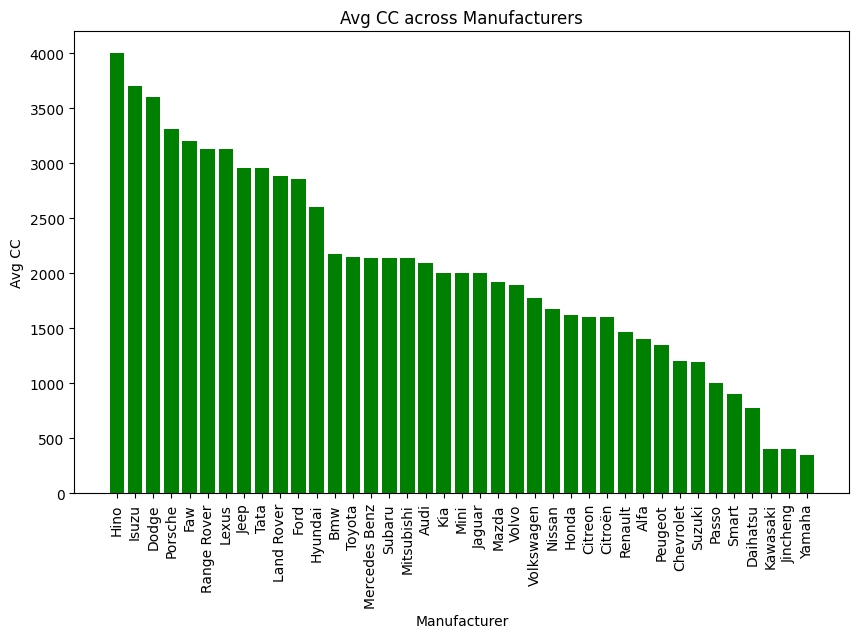

In [102]:
# Group the data by Manufacturer and find the mean of the cc
avg_cc = data.groupby('Manufacturer').mean(numeric_only = True)['CC'].sort_values(ascending = False)
manufacturer = avg_cc.index
cc = avg_cc.values

# Using bar chart
plt.figure(figsize = (10,6))
plt.bar(manufacturer,cc, color = 'green')
plt.xticks(rotation = 90)

#Adding labels and title
plt.title('Avg CC across Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Avg CC')
plt.show()

# 4.What is the average price of cars based on their usage origin?

In [100]:
# Group the data by usage origin and find the mean
origin_price = data.groupby('Usage Origin').mean(numeric_only = True)['Price']

# format as a numeric type but without scientific notation:
origin_avg_price = origin_price.apply(lambda x: '{:.2f}'.format(x))
origin_avg_price

Usage Origin
Foreign Used    3463466.98
Kenyan Used     2195917.30
Name: Price, dtype: object

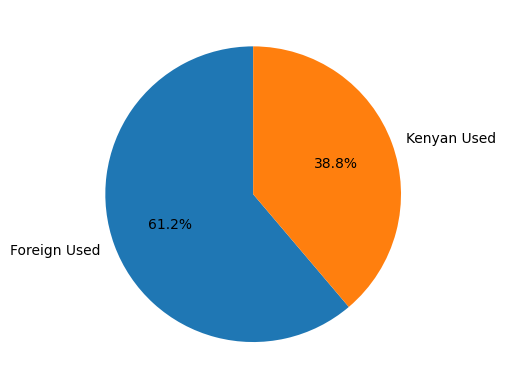

In [101]:
# Plotting a pie chart
plt.pie(origin_price, labels=origin_price.index, autopct='%1.1f%%', startangle=90)
plt.show()

## 5.Which car make has the highest average price?

In [34]:
# Group the data by Manufacturer and find the mean of the price
avg_price = data.groupby('Manufacturer').mean(numeric_only = True)['Price'].sort_values(ascending = False)
# Displaying the top 5 results
avg_price.head(5)

Manufacturer
Range Rover    8.107691e+06
Land Rover     7.282352e+06
Dodge          6.499999e+06
Porsche        5.823332e+06
Jaguar         5.199999e+06
Name: Price, dtype: float64

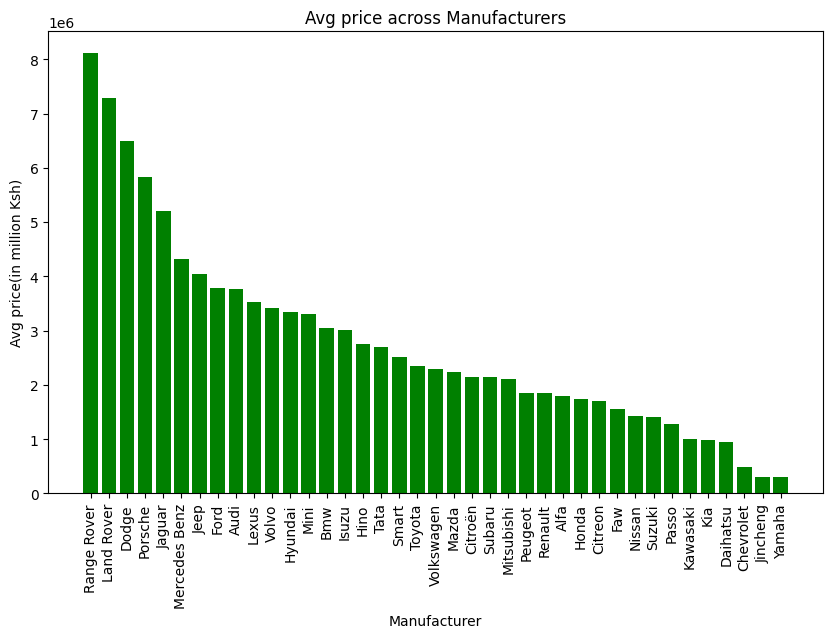

In [107]:
# Group the data by Manufacturer and find the mean of the cc
avg_price = data.groupby('Manufacturer').mean(numeric_only = True)['Price'].sort_values(ascending = False)
manufacturer = avg_price.index
price = avg_price.values

# Using bar chart
plt.figure(figsize = (10,6))
plt.bar(manufacturer,price, color = 'green')
plt.xticks(rotation = 90)

#Adding labels and title
plt.title('Avg price across Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Avg price(in million Ksh)')
plt.show()

# 6.Is there a correlation between engine displacement and price?

In [114]:
# Finding the correlation between price and cc
corr = data['Price'].corr(data['CC'])
print(f'correlaton coefficient: {round(corr,3)}')

correlaton coefficient: 0.531


## Correlation coefficient interpretation:
#### While 0.531 indicates a moderate correlation, it’s not a perfect correlation (which would be 1.0).
#### This means that while there is a general trend that larger engine displacement tends to be associated with higher prices, there are exceptions and other factors influencing price as well.

## Practical interpretation:
#### Engine Displacement: Typically, larger engine displacement often implies more powerful and possibly more advanced vehicles.
#### This can contribute to higher production costs, which can be reflected in the vehicle's price.

#### Price: The price is influenced by many factors, including engine displacement, but also factors like brand, model, features, and market conditions. Hence, while there is a moderate positive correlation, it’s not the sole determinant of price

# 7.Is there a relationship between age of the car and price?

In [116]:
# Finding the correlation between price and age
corr = data['Price'].corr(data['Car Age'])
print(f'correlaton coefficient: {round(corr,3)}')

correlaton coefficient: -0.403


## Interpretation:
#### A correlation coefficient of -0.403 between price and car age suggests a moderate negative relationship. This means that as the age of the car increases, the price tends to decrease, though the relationship isn't extremely strong.
#### In practical terms, it implies that older cars generally cost less, but there are other factors influencing the price as well.

# 8.Is there a trend towards larger or smaller engine displacement over the years?</br>

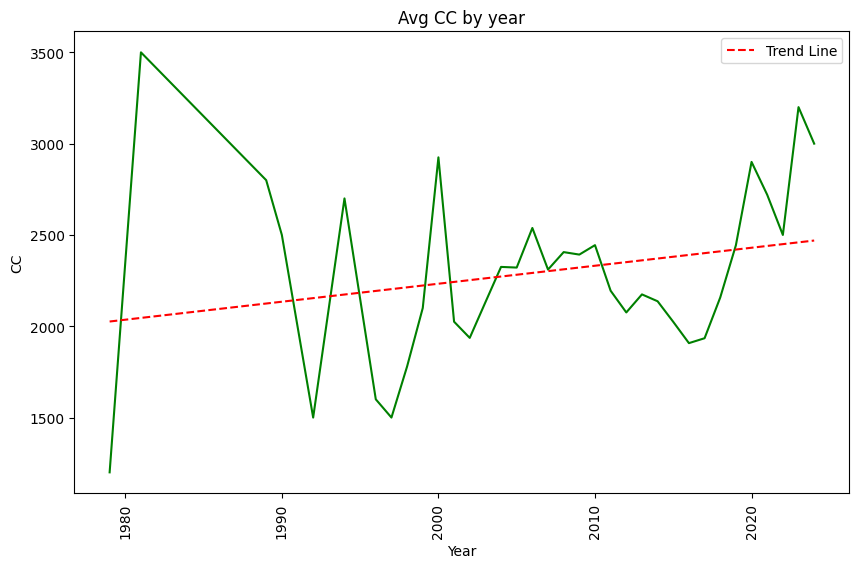

Trend line equation: y = 9.85x + -17473.71


In [16]:
# Calculating mean by year
avg_cc = data.groupby('Year').mean(numeric_only = True)['CC']
year = avg_price.index
cc = avg_price.values

# Plot
plt.figure(figsize = (10,6))
plt.plot(year,cc, color = 'green')

# Fit a trend line
z = np.polyfit(year, cc, 1)
p = np.poly1d(z)
plt.plot(year, p(year), linestyle='--', color='red', label='Trend Line')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('CC')
plt.title('Avg CC by year')
plt.legend()

# Rotating the years for better readability
plt.xticks(rotation = 90)

plt.show()


# Print the trend line equation
print(f'Trend line equation: y = {z[0]:.2f}x + {z[1]:.2f}')

### The engine displacement of cars tends to increase by approximately 9.85 cc each year from 1979 to 2024. This positive trend suggests that over this period, the average engine displacement of cars has been growing.

# 9.Which manufacturers have a widest range of price for their cars?

In [32]:
# Group by Manufacturer and find the range in each group
price_range = data.groupby('Manufacturer')['Price'].agg(lambda x: x.max() - x.min())

# Filter out manufacturers with a zero price range
price_range = price_range[price_range != 0]

# Sort from the highest to the lowest
order_price_range = price_range.sort_values(ascending = False)

# Show only top 3
order_price_range.head(3)

Manufacturer
Land Rover       21300000.0
Range Rover      15850000.0
Mercedes Benz    14470000.0
Name: Price, dtype: float64